<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_ProjetUber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jul14.csv')
df_backup = df
df.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [0]:
df.describe()

,Lat,Lon
count,796121.000000,796121.000000
mean,40.739141,-73.972353
std,0.040551,0.058660
min,39.721400,-74.826000
25%,40.720900,-73.996100
50%,40.742500,-73.983200
75%,40.760800,-73.965100
max,41.341300,-72.309700


In [0]:
df.groupby("Base").size().reset_index(name='count')

,Base,count
0,B02512,35021
1,B02598,245597
2,B02617,310160
3,B02682,196754
4,B02764,8589


In [0]:
df_groupedLL = df
df_groupedLL["latitude"] = df_groupedLL.Lat.apply(lambda x: round(float(x), 2))
df_groupedLL["longitude"] = df_groupedLL.Lon.apply(lambda x: round(float(x), 2))
df_groupedLL = df_groupedLL.groupby(["latitude", "longitude"]).size().reset_index(name='count')
df_groupedLL = df_groupedLL.drop("count", axis = 1)
df_groupedLL.head()

,latitude,longitude
0,39.72,-74.24
1,39.84,-74.15
2,39.91,-74.08
3,39.94,-74.07
4,39.95,-74.20


In [0]:
l = []
for item in df_groupedLL.values:
  l.append(tuple(item))


In [0]:
import folium
latlon = l #[ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit

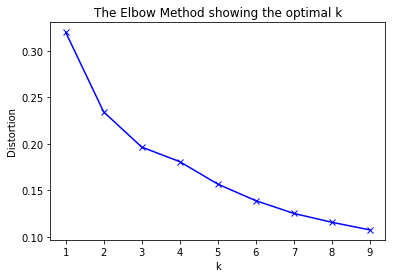

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
X=df_groupedLL
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4122176643926346
For n_clusters = 3 The average silhouette_score is : 0.37498963302357163
For n_clusters = 4 The average silhouette_score is : 0.3712136134124632
For n_clusters = 5 The average silhouette_score is : 0.3772168917881787
For n_clusters = 6 The average silhouette_score is : 0.3943214584844653


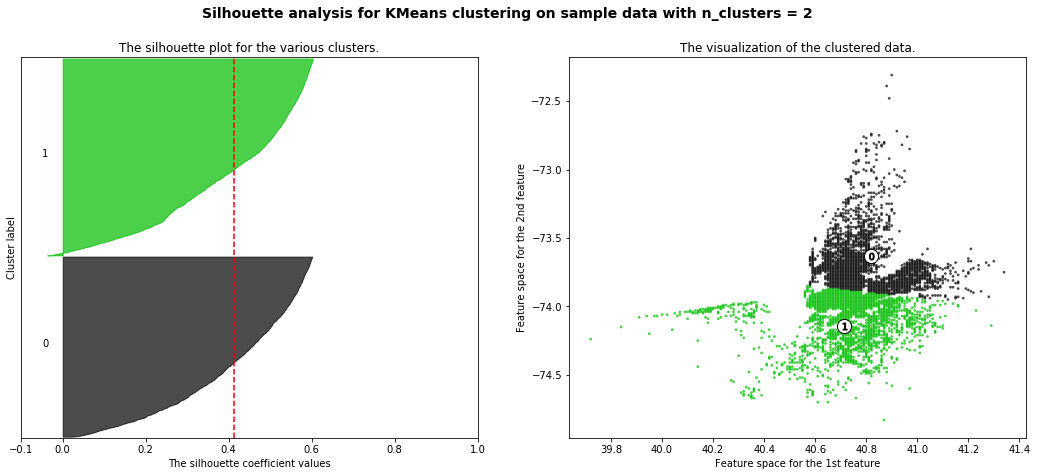

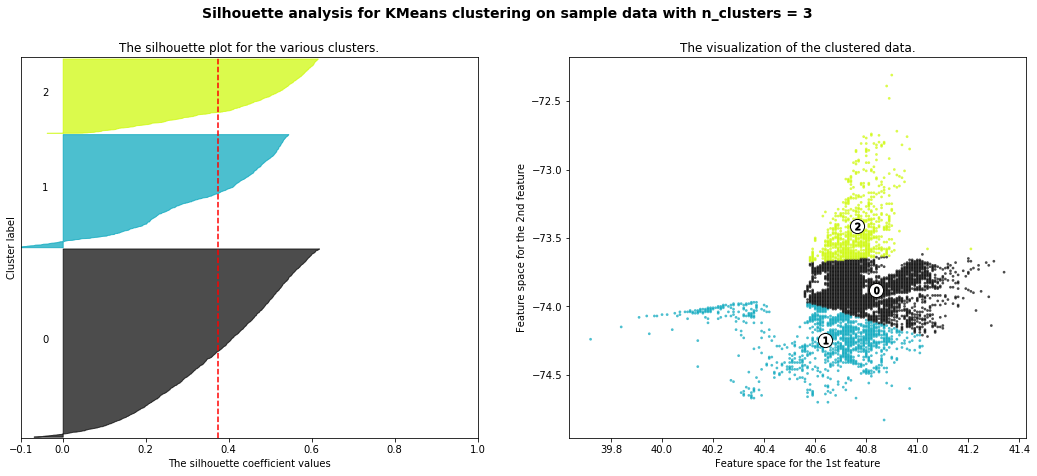

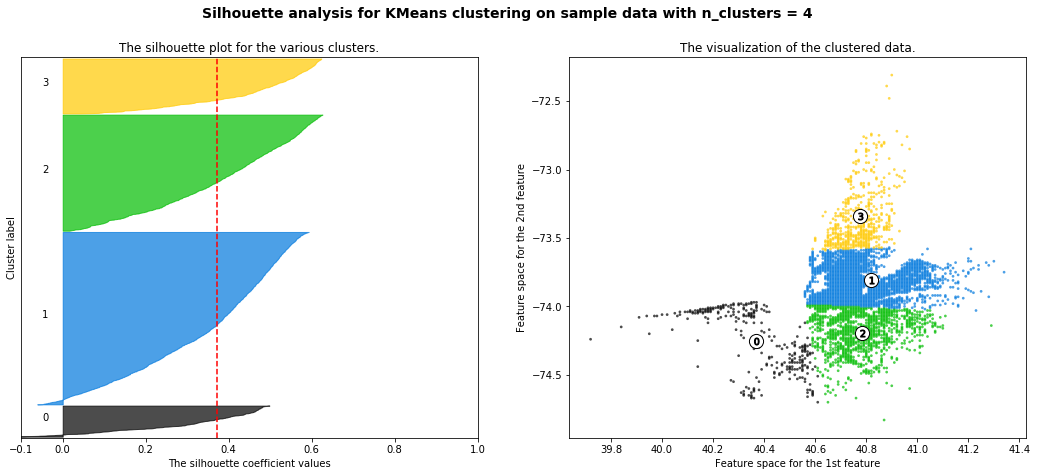

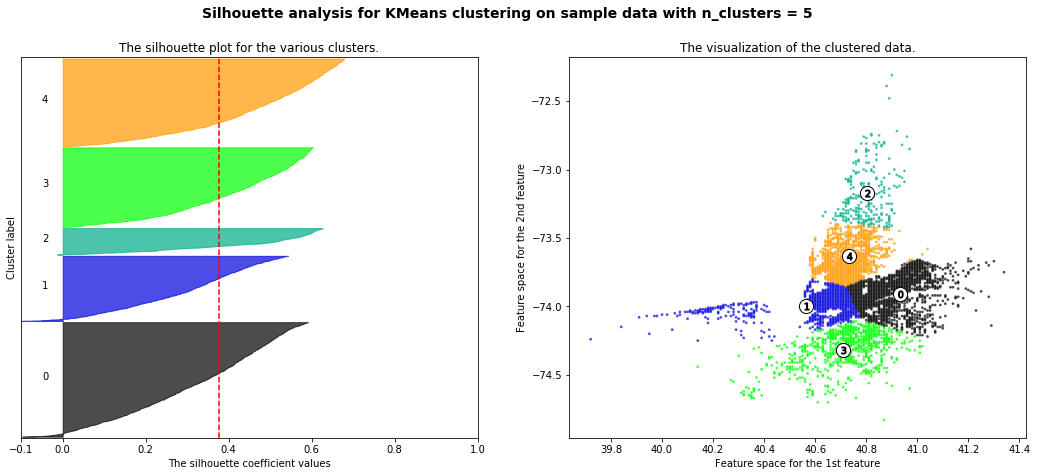

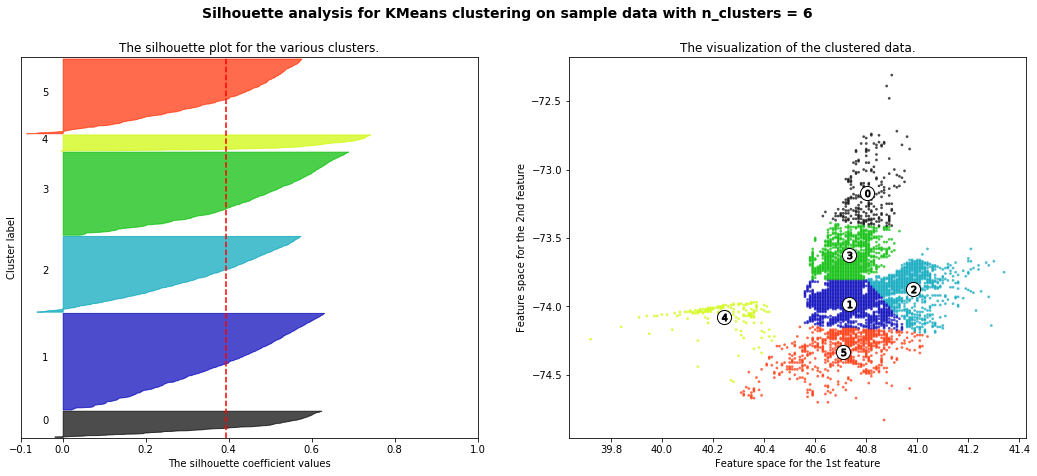

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
X=df_groupedLL.values

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [34]:
from datetime import datetime
df["Date/Time"] = df["Date/Time"].apply(lambda x: str(x).split(" "))
df["Date/Time"] = df["Date/Time"].apply(lambda x: str(x[0]+ " "+ x[1].rjust(8, '0')))
#df["Date/Time"] = df["Date/Time"].apply(lambda x: datetime.strptime(str(x),'%m/%d/%dY %H:%M:%S'))#7/1/2014 00:03:00
df["Date/Time"]= pd.to_datetime(df["Date/Time"])
df['p_year'] = df["Date/Time"].apply(lambda x: x.year)
df['p_month'] = df["Date/Time"].apply(lambda x: x.month)
df['p_day'] = df["Date/Time"].apply(lambda x: x.day)
df['hour'] = df["Date/Time"].apply(lambda x: x.hour)
df.head()

,Date/Time,Lat,Lon,Base,p_year,p_month,p_day,hour
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014,7,1,0
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014,7,1,0
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014,7,1,0
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014,7,1,0
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014,7,1,0


In [0]:
df = df.drop(columns = "Base", axis=1)
#df.groupby("Base").size().reset_index(name='count')

Récupérer jour de semaine, faire des tranches horaires, arrondir coordonées à 2 décimales (secteurs 1km)

In [37]:
import calendar
def weekday(y, m, d):
  return calendar.weekday(y, m, d)

df_groupedDay = df.groupby(["p_year", "p_month", "p_day"]).size().reset_index(name='count')
df_groupedDay["Key"]= ""
df_groupedDay["Day"] = 0
for index in range(len(df_groupedDay)):
  df_groupedDay.Day[index] = weekday(df_groupedDay.p_year[index], df_groupedDay.p_month[index], df_groupedDay.p_day[index])
  df_groupedDay.Key[index]= str(df_groupedDay.p_year[index])+"-"+str(df_groupedDay.p_month[index]).rjust(2,'0')+"-"+str(df_groupedDay.p_day[index]).rjust(2,'0')
df_groupedDay.drop("count", axis= 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,p_year,p_month,p_day,Key,Day
0,2014,7,1,2014-07-01,1
1,2014,7,2,2014-07-02,2
2,2014,7,3,2014-07-03,3
3,2014,7,4,2014-07-04,4
4,2014,7,5,2014-07-05,5
5,2014,7,6,2014-07-06,6
6,2014,7,7,2014-07-07,0
7,2014,7,8,2014-07-08,1
8,2014,7,9,2014-07-09,2
9,2014,7,10,2014-07-10,3


In [24]:
df = df.sort_values(by=["p_month", "p_day"])
df.head()

,Date/Time,Lat,Lon,p_year,p_month,p_day,Day
0,2014-07-01 00:03:00,40.7586,-73.9706,2014,7,1,6
1,2014-07-01 00:05:00,40.7605,-73.9994,2014,7,1,6
2,2014-07-01 00:06:00,40.7320,-73.9999,2014,7,1,6
3,2014-07-01 00:09:00,40.7635,-73.9793,2014,7,1,6
4,2014-07-01 00:20:00,40.7204,-74.0047,2014,7,1,6


In [38]:
df['Key'] = df["Date/Time"].apply(lambda x: str(x).split(" ")[0])
df.head()

,Date/Time,Lat,Lon,p_year,p_month,p_day,hour,Key
0,2014-07-01 00:03:00,40.7586,-73.9706,2014,7,1,0,2014-07-01
1,2014-07-01 00:05:00,40.7605,-73.9994,2014,7,1,0,2014-07-01
2,2014-07-01 00:06:00,40.7320,-73.9999,2014,7,1,0,2014-07-01
3,2014-07-01 00:09:00,40.7635,-73.9793,2014,7,1,0,2014-07-01
4,2014-07-01 00:20:00,40.7204,-74.0047,2014,7,1,0,2014-07-01


In [45]:
df = df.merge(df_groupedDay, on = 'Key')
df.head()
#for index in range(len(df)):
#  key  = str(df.p_year[index])+str(df.p_month[index])+str(df.p_day[index])
#  df["Day"] = df_groupedDay.get_values()[df_groupedDay.Key==key][0][5]
#df["Day"] = df["Day"].apply(lambda x: )
#df.apply(lambda x: df_groupedDay.query('lower_bound_ip_address <= @x <= upper_bound_ip_address').index.values)
#apply(lambda x: x[0] if len(x) else -1))
#apply(lambda x: IP_to_country.country[x] if x != -1 else x)'''

,Date/Time,Lat,Lon,p_year_x,p_month_x,p_day_x,hour,Key,p_year_y,p_month_y,p_day_y,count,Day
0,2014-07-01 00:03:00,40.7586,-73.9706,2014,7,1,0,2014-07-01,2014,7,1,21228,1
1,2014-07-01 00:05:00,40.7605,-73.9994,2014,7,1,0,2014-07-01,2014,7,1,21228,1
2,2014-07-01 00:06:00,40.7320,-73.9999,2014,7,1,0,2014-07-01,2014,7,1,21228,1
3,2014-07-01 00:09:00,40.7635,-73.9793,2014,7,1,0,2014-07-01,2014,7,1,21228,1
4,2014-07-01 00:20:00,40.7204,-74.0047,2014,7,1,0,2014-07-01,2014,7,1,21228,1


In [46]:
df = df.drop(columns=['Date/Time', 'p_year_x', 'p_month_x', 'p_day_x', 'Key', 	'p_year_y', 	'p_month_y', 	'p_day_y', 	'count'], axis = 1)
df.head()

,Lat,Lon,hour,Day
0,40.7586,-73.9706,0,1
1,40.7605,-73.9994,0,1
2,40.7320,-73.9999,0,1
3,40.7635,-73.9793,0,1
4,40.7204,-74.0047,0,1


In [47]:
df.Lat = df.Lat.apply(lambda x: round(float(x), 2))
df.Lon = df.Lon.apply(lambda x: round(float(x), 2))
df.head()

,Lat,Lon,hour,Day
0,40.76,-73.97,0,1
1,40.76,-74.00,0,1
2,40.73,-74.00,0,1
3,40.76,-73.98,0,1
4,40.72,-74.00,0,1


In [48]:
df.groupby(["hour"]).size().reset_index(name='count')

,hour,count
0,0,17953
1,1,11527
2,2,8562
3,3,9199
4,4,10040
5,5,14932
6,6,23456
7,7,32545
8,8,33387
9,9,28486
